# Second analysis. Combining sets of answers.

In [214]:
import json

def load_data(file):
    with open (file, "r", encoding = "utf-8") as f:
        data = json.load(f)
    return data

In [215]:
Stats_data = load_data(r"C:\Users\isaia\OneDrive\Desktop\Academic work\Scholarly activities\Research voluntering\Research voluntering 2024 Dr. Sanocki\Stats & LLM\Topic-modeling\Stats_T.M_LDA\Data\Json Format\Sanocki_Stats_Data.json")
print(Stats_data.keys())


dict_keys(['ID_code', 'Question 1', 'Question 2', 'Question 3'])


In [216]:
# assigning the data stored in each key to different variables.

Id_code = Stats_data["ID_code"]
Question_1 = Stats_data["Question 1"]
Question_2 = Stats_data["Question 2"]
Question_3 = Stats_data["Question 3"]



In [217]:
import string 
from nltk.corpus import stopwords  


custom_stopwords = ["also", "occur", "lets", "us", "likely", "would", "make", "may", "know", "aka", "ok", "versa", "vice", "well", "way"]
stops = stopwords.words("english") + custom_stopwords  

def clean_docs(docs):
    stops = stopwords.words("english")

    final = [] 
 
    for doc in docs:
        clean_doc = remove_stop_punc(doc, stops)
        final.append(clean_doc)

    return(final)    


def remove_stop_punc(text, stops):
    words = text.split()
    final = []
    for word in words:
        if word.lower() not in stops:
            final.append(word) 

    final = " ".join(final)

    final = "".join([i for i in final if not i.isdigit()])

    final = final.replace("/", " ")

    final = final.replace("-", " ")

    final = final.translate(str.maketrans("", "", string.punctuation + "()"))

    while "  " in final:
        final = final.replace("  ", " ")
    return (final)



In [218]:
cleaned_Q1 = clean_docs(Question_1) 
cleaned_Q1 = [remove_stop_punc(doc, stops) for doc in cleaned_Q1] 

cleaned_Q2 = clean_docs(Question_2)
cleaned_Q2 = [remove_stop_punc(doc, stops) for doc in cleaned_Q2]

cleaned_Q3 = clean_docs(Question_3)
cleaned_Q3 = [remove_stop_punc(doc, stops) for doc in cleaned_Q3]


In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(lowercase = True,
                             max_features = 300,
                             max_df = .50,
                             min_df = 2,
                             ngram_range = (1, 2),
                             stop_words = "english"
                             )

Q1_vectors = vectorizer.fit_transform(cleaned_Q1)
Q2_vectors = vectorizer.fit_transform(cleaned_Q2)
Q3_vectors = vectorizer.fit_transform(cleaned_Q3)

all_vectors_list_test = vectorizer.fit_transform(cleaned_Q1 + cleaned_Q2 + cleaned_Q3)



In [220]:
dense_Q1 = Q1_vectors.todense()
dense_Q2 = Q2_vectors.todense()
dense_Q3 = Q3_vectors.todense()

dense_Q1_list = dense_Q1.tolist()
dense_Q2_list = dense_Q2.tolist()
dense_Q3_list = dense_Q3.tolist()

all_vectors_list = dense_Q1_list + dense_Q2_list + dense_Q3_list

print(all_vectors_list)

feature_names = vectorizer.get_feature_names_out()


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2744211298515413, 0.0, 0.0, 0.0, 0.0, 0.3607262929957144, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23860125076533112, 0.0, 0.0, 0.0, 0.3607262929957144, 0.3607262929957144, 0.25522751564607155, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2971223571595576, 0.2971223571595576, 0.0, 0.0, 0.0, 0.0, 0.3249064139095042, 0.3607262929957144, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14477168802824994, 0.18429537220474132, 0.0, 0.0, 0.15565880543349914, 0.0, 0.0, 0.0, 0.0, 0.20461333967447748, 0.0, 0.0, 0.18429537220474132, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20461333967447748, 0.20461333967447748, 0.14477168802824994, 0.20461333967447748, 0.0, 0.0, 0.20461333967447748, 0.20461333967447748, 0.15565880543349914, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [233]:
all_keywords = []

for description in all_vectors_list:
    x = 0
    keywords = []
    for word in description:
        if word > .20:
            keywords.append(feature_names[x])
        x += 1
    all_keywords.append(keywords)    

In [222]:
true_k = min(3, len(all_vectors_list_test.toarray()) // 2)

model = KMeans(
    n_clusters = true_k,
    init = "random",
    max_iter = 100,
    n_init = 50,
    random_state = 1 
)
model.fit(all_vectors_list_test)

order_centroids = model.cluster_centers_.argsort()[:, :: -1]

terms = vectorizer.get_feature_names_out()


i = 0
for clusters in order_centroids:
    print(f"Cluster {i}")
    for keyword in clusters[0:15]:
        print(terms[keyword])
    print("")
    i = i +1

Cluster 0
statistical
chance
inference
data
study
experiment
accurate
allows
accuracy
statistical inference
statistics
inferences
significance
statistical significance
determine

Cluster 1
effect
iv
iv effect
effect difference
means
difference means
variable
shows
independent
independent variable
statistical
shows difference
inference
statistical inference
groups

Cluster 2
mean
se
standard
standard error
se mean
se difference
sample
means
error mean
data
samples
error difference
far
refers
sample mean



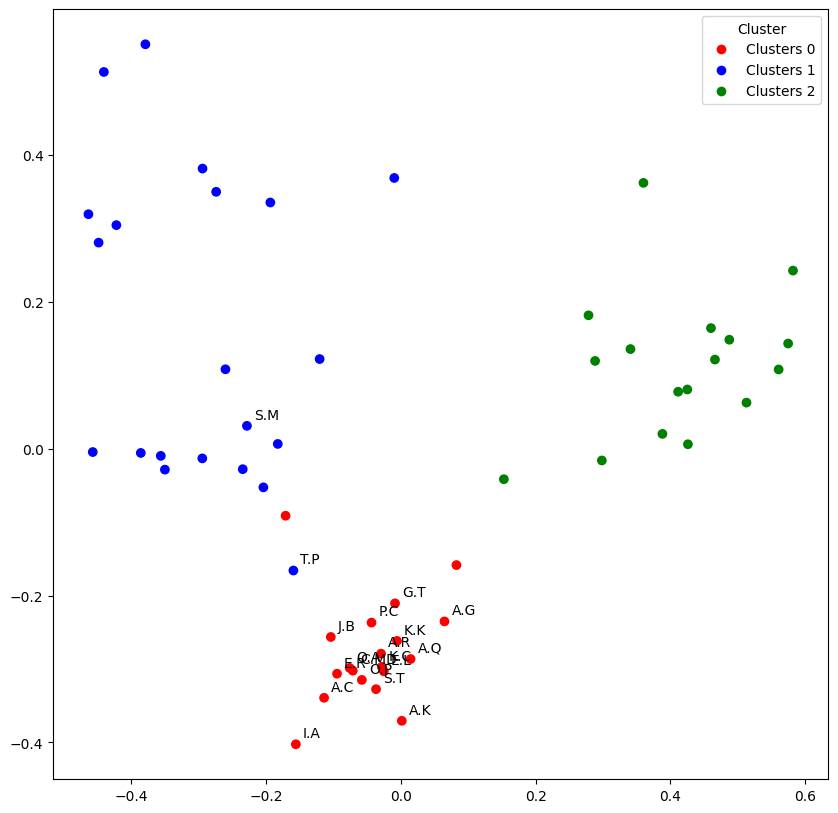

ID: O.A| Keywords: big difference, caused iv, comparing, data, data standard, decide, effect effect, effect error, effect shows, effect statistical
ID: I.A| Keywords: caused iv, data, data standard, deemed, determines, deviation, effect, effect independent, effects, error differences, fail, group
ID: J.B| Keywords: big, calculates, chance error, confounds, control, deviation square, effect experiment, error difference, error means, errors, experimental group
ID: P.C| Keywords: applied, average, change, error cause, factors
ID: K.C| Keywords: accuracy, effect plays, error nuisance, experiment
ID: A.C| Keywords: big, deviation square, errors
ID: A.G| Keywords: applied, average, differences, differences means, error known, error mean, error plays, error samples, error used
ID: A.K| Keywords: accept null, accuracy, accurate, big, big difference, comparing, difference difference, factors
ID: K.K| Keywords: applied, comparing, control group, effect real
ID: E.L| Keywords: difference differen

In [228]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Kmean_indices = model.predict(all_vectors_list_test)

num_componets = min(2, len(all_vectors_list_test.toarray()))

pca = PCA(n_components = num_componets)
scatter_plot_points = pca.fit_transform(all_vectors_list_test.toarray())

colors = ["red", "blue", "green"]

num_clusters = len(set(Kmean_indices))
clsuter_colors = colors[:num_clusters]

x_axis = scatter_plot_points[:, 0]
y_axis = scatter_plot_points[:, 1]

fig, ax = plt.subplots(figsize = (10, 10))
scatter = ax.scatter(x_axis,
                     y_axis,
                     c = [colors[d] for d in Kmean_indices]
                     )

for i, txt in enumerate(Id_code):
    ax.annotate(txt[0:11],
                (x_axis[i], y_axis[i]),
                textcoords = "offset points",
                xytext = (5, 5),
                fontsize = 10)
    
handles = [plt.Line2D([0], [0],
                      marker = "o",
                      color = "w",
                      markerfacecolor = colors[i],
                      markersize = 8) for i in range(num_clusters)
                      ]    

ax.legend(handles,
          [f"Clusters {i}" for i in range(num_clusters)],
          title = "Cluster")

plt.show()

for id_code, keywords in zip(Id_code, all_keywords):
    print(f"ID: {id_code}| Keywords: {', '.join(keywords)}")

In [224]:
import pandas as pd 

all_vectors_df = pd.DataFrame(all_vectors_list_test.toarray(), columns = vectorizer.get_feature_names_out())

all_vectors_df.index = Id_code + Id_code + Id_code



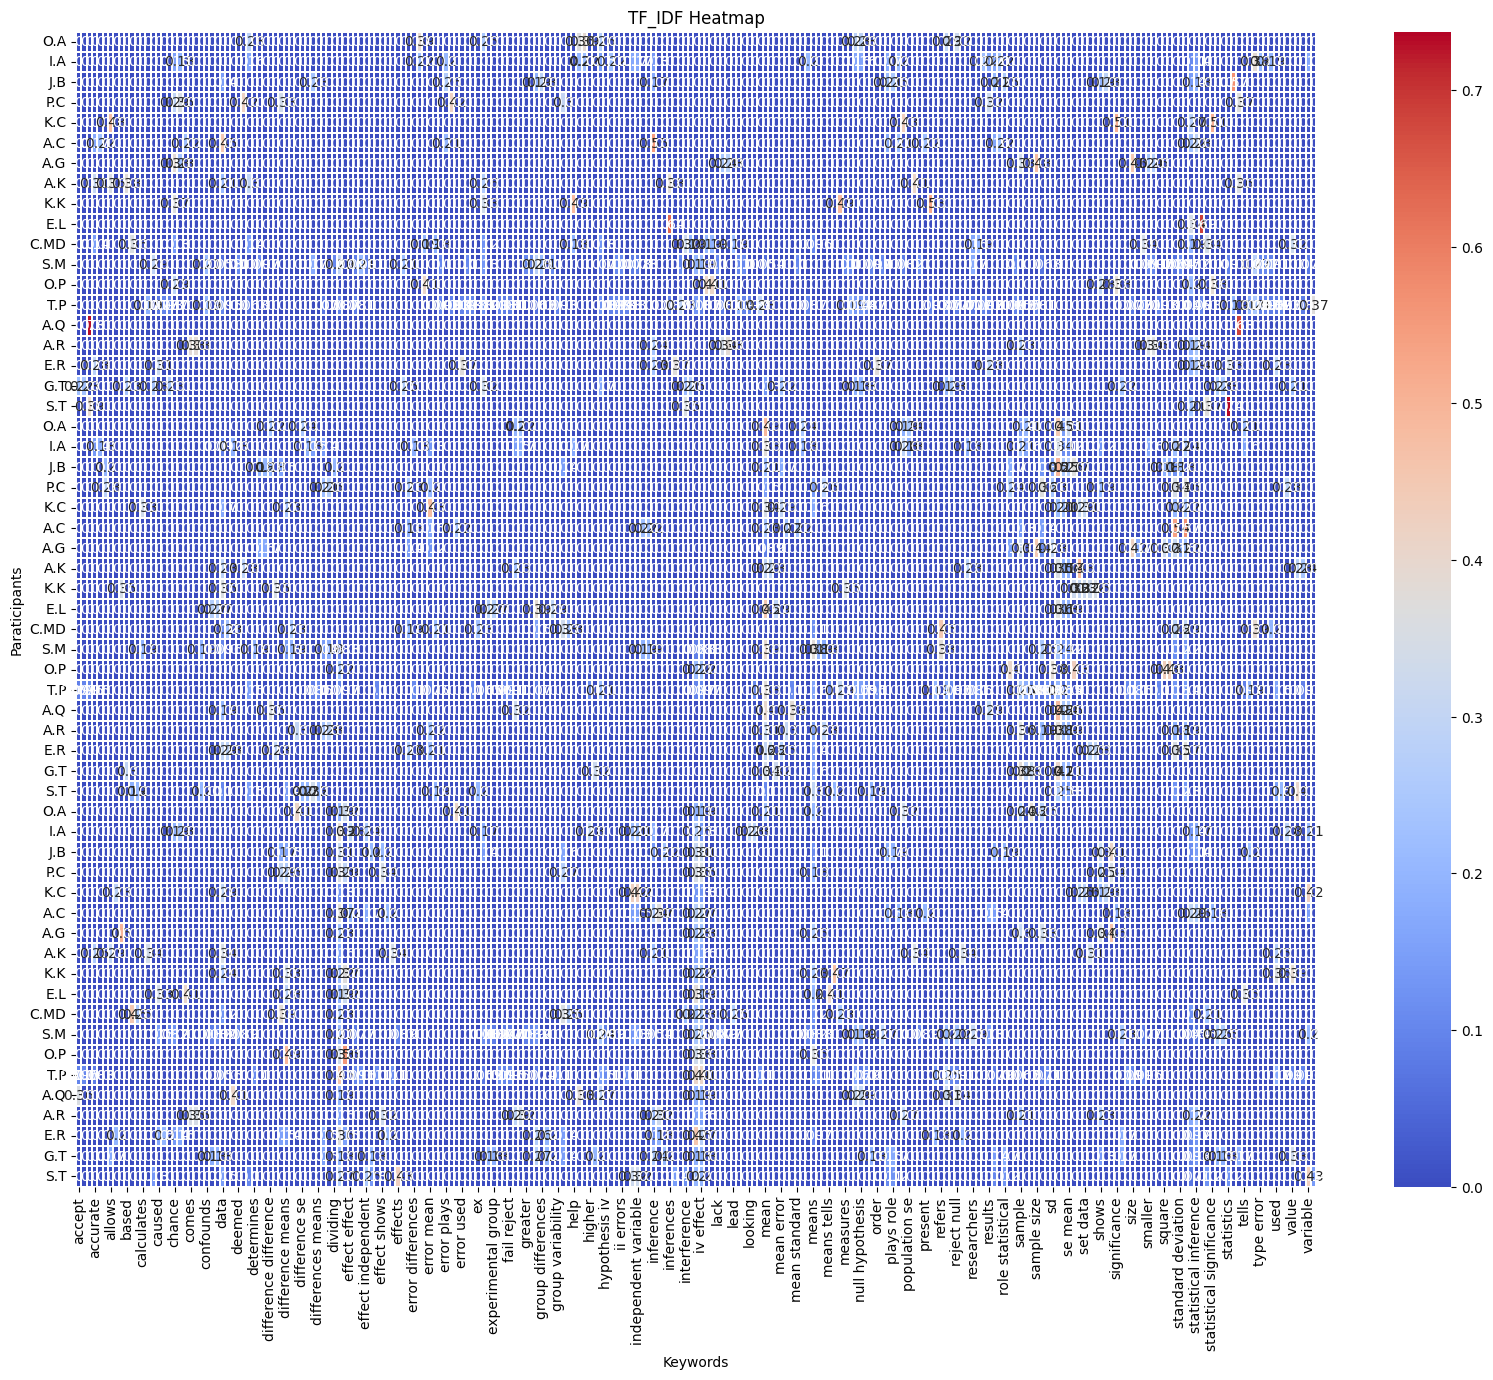

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (20, 15))

sns.heatmap(all_vectors_df,
            robust = False,
            annot = True,
            cmap = "coolwarm",
            linewidths = .05,
                 )

plt.title("TF_IDF Heatmap")

plt.xlabel('Keywords')

plt.ylabel("Paraticipants")

plt.show()